In [1]:
import numpy as np

def generate_data(num_samples):
    x_train = np.linspace(-1, 1, 50).reshape(-1, 1)
    y_train = .5 * np.sin(4 * x_train) * np.exp(-(x_train+1)) + .5 
    return x_train, y_train
def mean_squared_error(y_true, y_pred, get_derivative=False):
    if get_derivative:
        return 2 * (y_pred - y_true) / y_true.size
    return np.mean((y_pred - y_true) ** 2)

In [2]:
def test(network, X, y):
    test_loss = 0
    for i in range(len(X)):
        # self.zero_grad()
        # Forward pass
        inputs = np.array([X[i]])
        target = y[i]
        print(inputs)
        outputs = network.forward(inputs)[0]
        # print(f"outputs: {outputs}, target: {target}")
        loss = mean_squared_error(target, outputs)
        test_loss += loss
    
    test_loss /= len(X)
    print(f"Test Loss: {test_loss}")

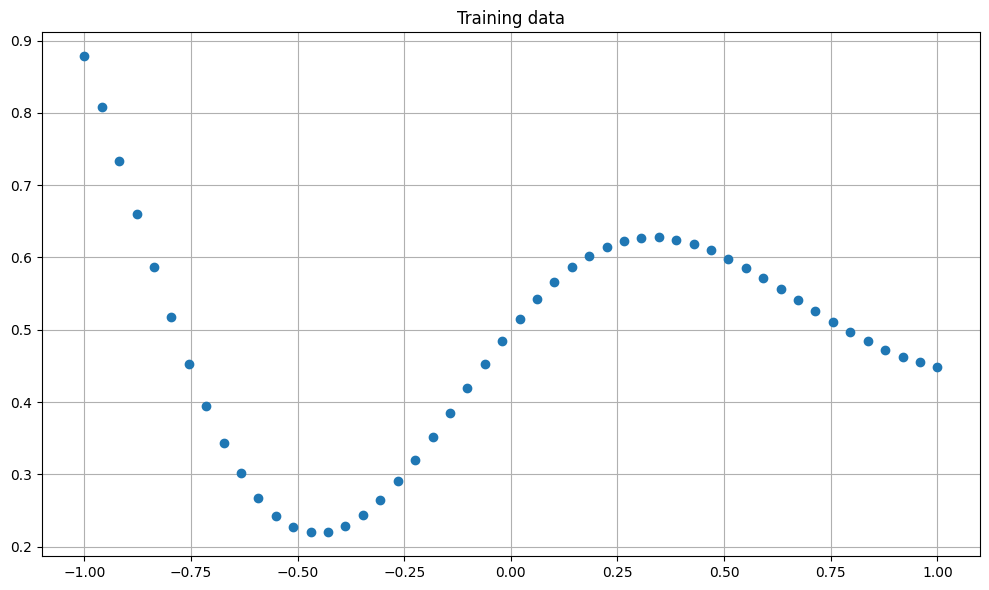

In [3]:
num_samples = 100
X, y = generate_data(num_samples)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(X, y, 'o')
ax.set_title('Training data')
ax.grid()
fig.tight_layout()

WORKS WITH SEED 472 BUT DOESN'T WITH 42 ??? WHY AMK

In [4]:
from mlp import MLPNeuron
from act import relu
from feedforwad import FeedForwardNetwork
# Initialize the network with multiple layers

mlp_network = FeedForwardNetwork(
                  layers_shape=[1, 8, 1],  # layer size
                  neuron_class=MLPNeuron, 
                  activation=relu,  # activation type (ReLU, tanh or sigmoid)
                  learning_rate=0.01,
                  weights_range=[-.5, .5],
                  seed=472,
                  )

mlp_losses = mlp_network.train(x_train=X, y_train=y, epochs=500)

Epoch 1/500, Loss: 0.2236173701051834
Epoch 2/500, Loss: 0.10054432423430416
Epoch 3/500, Loss: 0.04407611413254819
Epoch 4/500, Loss: 0.030934475341935427
Epoch 5/500, Loss: 0.02572830829074538
Epoch 6/500, Loss: 0.023114738921571506
Epoch 7/500, Loss: 0.021488705470123427
Epoch 8/500, Loss: 0.020391350741669183
Epoch 9/500, Loss: 0.019601883308990122
Epoch 10/500, Loss: 0.019018372827215576
Epoch 11/500, Loss: 0.018575161519738315
Epoch 12/500, Loss: 0.018225698598210435
Epoch 13/500, Loss: 0.017938261805587087
Epoch 14/500, Loss: 0.0177021974205799
Epoch 15/500, Loss: 0.017493584477826427
Epoch 16/500, Loss: 0.017308325117157953
Epoch 17/500, Loss: 0.017152723589756474
Epoch 18/500, Loss: 0.017002033001062903
Epoch 19/500, Loss: 0.01686626255878155
Epoch 20/500, Loss: 0.01673888548271673
Epoch 21/500, Loss: 0.016610458642691575
Epoch 22/500, Loss: 0.016483488363926668
Epoch 23/500, Loss: 0.016366410979784522
Epoch 24/500, Loss: 0.016251174440546155
Epoch 25/500, Loss: 0.016135434693

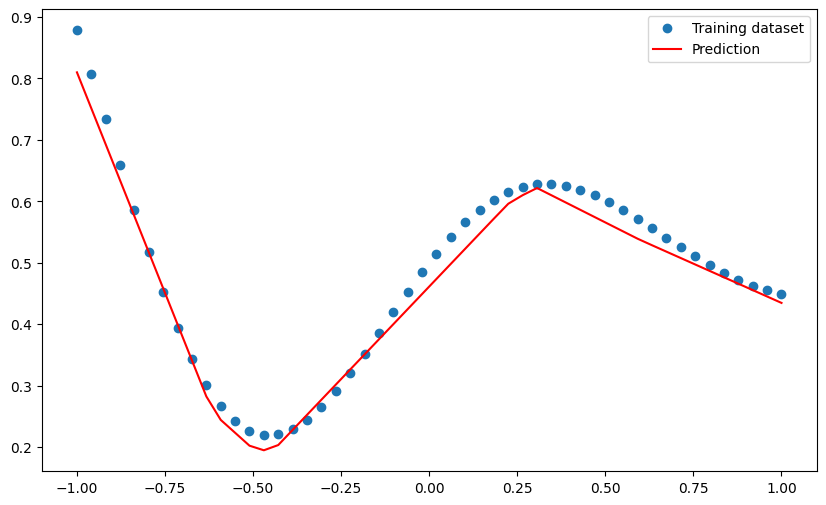

In [5]:
predictions = [mlp_network.forward([x])[0] for x in X]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, y, 'o', label='Training dataset')
ax.plot(X, predictions, 'r-', label='Prediction')
ax.legend()
plt.show()

In [6]:
from kan import KANNeuron
from b_splines import get_bsplines
kan_network = FeedForwardNetwork([1, 2, 1],  # layer size
                  neuron_class=KANNeuron, 
                  x_bounds=[-1, 1],  # input domain bounds
                  get_edge_fun=get_bsplines,  # edge function type (B-splines ot Chebyshev)
                  seed=472,
                  learning_rate=0.01,
                  n_weights_per_edge=7,  # n. edge functions
                  weights_range=[-1, 1])

In [7]:
kan_losses = kan_network.train(X, y, epochs=500)

Epoch 1/500, Loss: 0.5109318596886501
Epoch 2/500, Loss: 0.056381855917587036
Epoch 3/500, Loss: 0.03223221115774549
Epoch 4/500, Loss: 0.026294676652346468
Epoch 5/500, Loss: 0.023818836851907235
Epoch 6/500, Loss: 0.02242369937741219
Epoch 7/500, Loss: 0.02149058285034128
Epoch 8/500, Loss: 0.02080676601114191
Epoch 9/500, Loss: 0.020278966469931933
Epoch 10/500, Loss: 0.01985691505172038
Epoch 11/500, Loss: 0.01950945921990437
Epoch 12/500, Loss: 0.01921573652497864
Epoch 13/500, Loss: 0.018961221883502938
Epoch 14/500, Loss: 0.018735601457446172
Epoch 15/500, Loss: 0.018531469281224094
Epoch 16/500, Loss: 0.018343466747818997
Epoch 17/500, Loss: 0.018167692719208497
Epoch 18/500, Loss: 0.0180012912859449
Epoch 19/500, Loss: 0.017842160457606622
Epoch 20/500, Loss: 0.017688744745335775
Epoch 21/500, Loss: 0.01753988660028016
Epoch 22/500, Loss: 0.017394719473282205
Epoch 23/500, Loss: 0.017252590497374227
Epoch 24/500, Loss: 0.017113004337321533
Epoch 25/500, Loss: 0.016975581919190

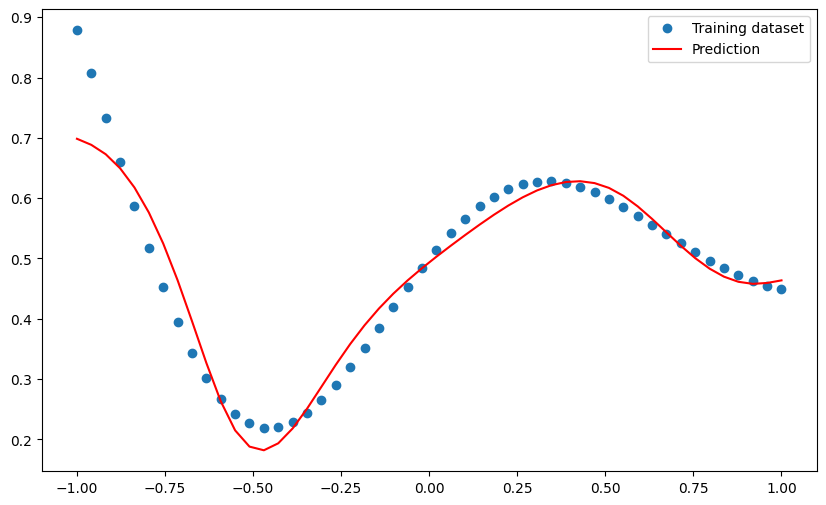

In [8]:
predictions = [kan_network.forward(x) for x in X]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(X, y, 'o', label='Training dataset')
ax.plot(X, predictions, 'r-', label='Prediction')
ax.legend()
plt.show()

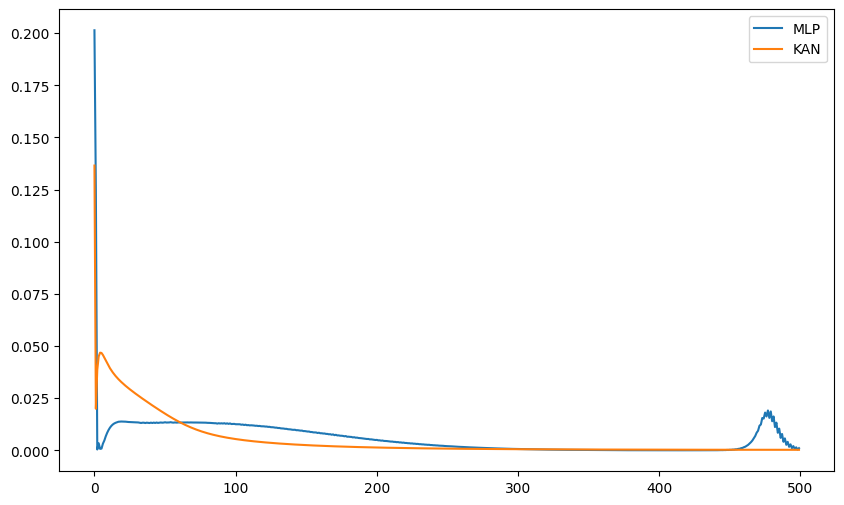

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mlp_losses, label='MLP')
ax.plot(kan_losses, label='KAN')
ax.legend()
plt.show()

## 2D Regression

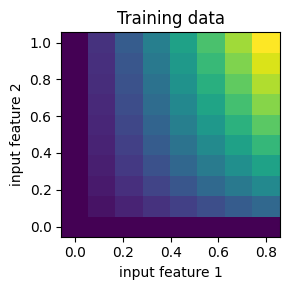

In [10]:
def fun2d(X1, X2):
    return X1 * np.power(X2, .5)

X1, X2 = np.meshgrid(np.linspace(0, .8, 8), np.linspace(0, 1, 10))
Y_training = fun2d(X1, X2)

x_train2d = np.concatenate((X1.reshape(-1, 1), X2.reshape(-1, 1)), axis=1)
y_train2d = Y_training.reshape(-1, 1)

f, a = plt.subplots(figsize=(3,3))
a.set_xlabel('input feature 1')
a.set_ylabel('input feature 2')
a.pcolor(X1, X2, Y_training)
a.set_title('Training data')
f.tight_layout()
plt.show()

In [11]:
kan_2d = FeedForwardNetwork([2, 2, 1],  # layer size
                  learning_rate=.02,  # gradient descent parameter
                  n_weights_per_edge=10,  # n. edge functions
                  neuron_class=KANNeuron, 
                  x_bounds=[-1, 1],  # input domain bounds
                  get_edge_fun=get_bsplines,  # edge function type (B-splines ot Chebyshev)
                  seed=472,
                  weights_range=[-1, 1])
kan_loss_2d = kan_2d.train(x_train2d, 
                           y_train2d, 
                           epochs=500)

Epoch 1/500, Loss: 0.5658726638740588
Epoch 2/500, Loss: 0.3136246870236262
Epoch 3/500, Loss: 0.08810713068404068
Epoch 4/500, Loss: 0.07047211162774603
Epoch 5/500, Loss: 0.06459387541710301
Epoch 6/500, Loss: 0.0651838036474199
Epoch 7/500, Loss: 0.08223024707637863
Epoch 8/500, Loss: 0.08300485016727319
Epoch 9/500, Loss: 0.13323813188639386
Epoch 10/500, Loss: 0.08067569301319265
Epoch 11/500, Loss: 0.13057562453763522
Epoch 12/500, Loss: 0.07990500992705167
Epoch 13/500, Loss: 0.13424887053383144
Epoch 14/500, Loss: 0.07575621000286173
Epoch 15/500, Loss: 0.13017667013073678
Epoch 16/500, Loss: 0.07447692072393411
Epoch 17/500, Loss: 0.1324836222021714
Epoch 18/500, Loss: 0.06940081338698263
Epoch 19/500, Loss: 0.12461619349326195
Epoch 20/500, Loss: 0.0688929579518788
Epoch 21/500, Loss: 0.12615849748486482
Epoch 22/500, Loss: 0.06367229037357083
Epoch 23/500, Loss: 0.1151008963980185
Epoch 24/500, Loss: 0.06415493079072734
Epoch 25/500, Loss: 0.1165250925698301
Epoch 26/500, Lo

In [12]:
mlp_2d = FeedForwardNetwork([2, 6, 1],  # layer size
                     learning_rate=.0025,  # gradient descend parameter
                     activation=relu,  # activation type (ReLU, tanh or sigmoid)
                     neuron_class=MLPNeuron, 
                     seed=472, 
                     weights_range=[-.1, .1])
mlp_losses_2d = mlp_2d.train(x_train2d, 
                             y_train2d, 
                             epochs=500)

Epoch 1/500, Loss: 0.11425987493516461
Epoch 2/500, Loss: 0.09192176961250231
Epoch 3/500, Loss: 0.0635451921298943
Epoch 4/500, Loss: 0.05341668760527322
Epoch 5/500, Loss: 0.049784171969910015
Epoch 6/500, Loss: 0.04847240823356083
Epoch 7/500, Loss: 0.04799106984146482
Epoch 8/500, Loss: 0.04780675205233191
Epoch 9/500, Loss: 0.047728754201124615
Epoch 10/500, Loss: 0.04768825454013757
Epoch 11/500, Loss: 0.04766071102050516
Epoch 12/500, Loss: 0.04763749750226397
Epoch 13/500, Loss: 0.04761556719705766
Epoch 14/500, Loss: 0.04759351366531402
Epoch 15/500, Loss: 0.047570856520910594
Epoch 16/500, Loss: 0.047547211664986974
Epoch 17/500, Loss: 0.047522605396697615
Epoch 18/500, Loss: 0.047497101628538325
Epoch 19/500, Loss: 0.04747061806387186
Epoch 20/500, Loss: 0.04744323186413314
Epoch 21/500, Loss: 0.0474149924396567
Epoch 22/500, Loss: 0.04738536603588508
Epoch 23/500, Loss: 0.047354474397218856
Epoch 24/500, Loss: 0.047322284946374145
Epoch 25/500, Loss: 0.047288790596805644
Ep

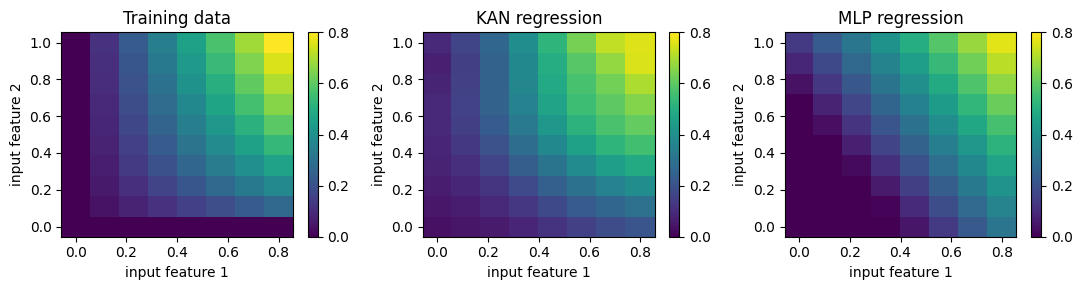

In [13]:
Y_kan = np.array([kan_2d.forward(xx) for xx in x_train2d])
Y_mlp = np.array([mlp_2d.forward(xx) for xx in x_train2d])

f, a = plt.subplots(1, 3, figsize=(11,3))

vmin, vmax = min(Y_training.flatten()), max(Y_training.flatten())

im0 = a[0].pcolor(X1, X2, Y_training, vmin=vmin, vmax=vmax)
f.colorbar(im0, ax=a[0])
a[0].set_title('Training data')
a[0].set_xlabel('input feature 1')
a[0].set_ylabel('input feature 2')

im1 = a[1].pcolor(X1, X2, Y_kan.reshape(X1.shape), vmin=vmin, vmax=vmax)
f.colorbar(im1, ax=a[1])
a[1].set_title('KAN regression')
a[1].set_xlabel('input feature 1')
a[1].set_ylabel('input feature 2')

im2 = a[2].pcolor(X1, X2, Y_mlp.reshape(X1.shape), vmin=vmin, vmax=vmax)
f.colorbar(im2, ax=a[2])
a[2].set_title('MLP regression')
a[2].set_xlabel('input feature 1')
a[2].set_ylabel('input feature 2')

f.tight_layout()
plt.show()
# f.savefig(folder_fig + 'regr2D.png', dpi=500)

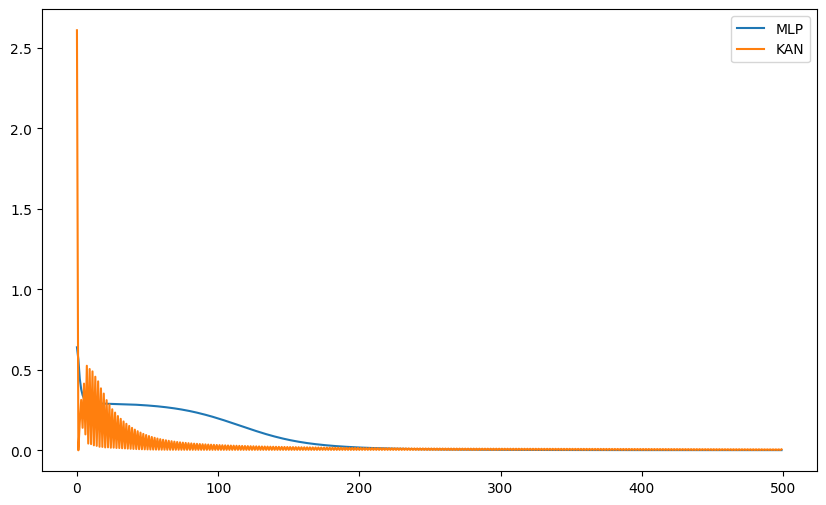

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mlp_losses_2d, label='MLP')
ax.plot(kan_loss_2d, label='KAN')
ax.legend()
plt.show()

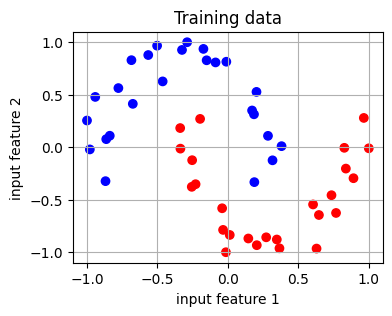

In [33]:
from sklearn import datasets

n_samples = 50
noise = 0.1
x_train_cl, y_train_cl = datasets.make_moons(n_samples=n_samples, noise=noise)
# normalize between -1 and 1
x_train_cl[:, 0] = (x_train_cl[:, 0] - min(x_train_cl[:, 0])) / max(x_train_cl[:, 0] - min(x_train_cl[:, 0])) * 2 - 1
x_train_cl[:, 1] = (x_train_cl[:, 1] - min(x_train_cl[:, 1])) / max(x_train_cl[:, 1] - min(x_train_cl[:, 1])) * 2 - 1

fig, ax = plt.subplots(figsize=(4,3))
ax.scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
ax.set_xlabel('input feature 1')
ax.set_ylabel('input feature 2')
ax.grid()
ax.set_title("Training data")
plt.show()

In [19]:
from loss import CrossEntropyLoss

kan_cl = FeedForwardNetwork([2, 2],  # layer size
                     learning_rate=.02,  # gradient descent parameter
                     n_weights_per_edge=8,  # n. edge functions
                     neuron_class=KANNeuron, 
                     loss=CrossEntropyLoss,
                     x_bounds=[-1, 1],  # input domain bounds
                     get_edge_fun=get_bsplines,  # edge function type (B-splines ot Chebyshev)
                     seed=472,
                     weights_range=[-1, 1])
kan_loss_cls = kan_cl.train(x_train_cl, y_train_cl.reshape(-1, 1), epochs=1500)

Epoch 1/1500, Loss: 0.5755066530183932
Epoch 2/1500, Loss: 0.5389661852947238
Epoch 3/1500, Loss: 0.5089640412819586
Epoch 4/1500, Loss: 0.4839138530060994
Epoch 5/1500, Loss: 0.462774308029366
Epoch 6/1500, Loss: 0.44484129511564646
Epoch 7/1500, Loss: 0.4295943205760072
Epoch 8/1500, Loss: 0.4166092881475445
Epoch 9/1500, Loss: 0.405521479209445
Epoch 10/1500, Loss: 0.39601437504898357
Epoch 11/1500, Loss: 0.38781691072117686
Epoch 12/1500, Loss: 0.3807012162400737
Epoch 13/1500, Loss: 0.3744788007924509
Epoch 14/1500, Loss: 0.36899551837854866
Epoch 15/1500, Loss: 0.36412615099162887
Epoch 16/1500, Loss: 0.35976925848036734
Epoch 17/1500, Loss: 0.3558426403257414
Epoch 18/1500, Loss: 0.35227952235712345
Epoch 19/1500, Loss: 0.3490254464816987
Epoch 20/1500, Loss: 0.34603577938156144
Epoch 21/1500, Loss: 0.34327373755619633
Epoch 22/1500, Loss: 0.34070882962366644
Epoch 23/1500, Loss: 0.33831562952601935
Epoch 24/1500, Loss: 0.3360728093738583
Epoch 25/1500, Loss: 0.33396237493024267

In [20]:
from act import tanh_act
mlp_cl = FeedForwardNetwork([2, 10, 10, 2],  # layer size
                     learning_rate=.01,  # gradient descend parameter
                     activation=tanh_act,  # activation type (relu, tanh_act or sigmoid_act)
                     neuron_class=MLPNeuron, 
                     loss=CrossEntropyLoss,
                     seed=472, 
                     weights_range=[-1, 1])
mlp_loss_cls = mlp_cl.train(x_train_cl, 
                            y_train_cl.reshape(-1, 1), 
                            epochs=1500)

Epoch 1/1500, Loss: 1.1300583032384977
Epoch 2/1500, Loss: 0.516590880125577
Epoch 3/1500, Loss: 0.4247237236128602
Epoch 4/1500, Loss: 0.40202497082027955
Epoch 5/1500, Loss: 0.39085989139165556
Epoch 6/1500, Loss: 0.3844881294509921
Epoch 7/1500, Loss: 0.3804592719589664
Epoch 8/1500, Loss: 0.3776745620197977
Epoch 9/1500, Loss: 0.37560262747819095
Epoch 10/1500, Loss: 0.3739691819265441
Epoch 11/1500, Loss: 0.3726224908740992
Epoch 12/1500, Loss: 0.37147273915738555
Epoch 13/1500, Loss: 0.3704634165609655
Epoch 14/1500, Loss: 0.3695570431919235
Epoch 15/1500, Loss: 0.36872762092506484
Epoch 16/1500, Loss: 0.36795641234965326
Epoch 17/1500, Loss: 0.36722945785637817
Epoch 18/1500, Loss: 0.36653604887132346
Epoch 19/1500, Loss: 0.36586775257770854
Epoch 20/1500, Loss: 0.3652177685476986
Epoch 21/1500, Loss: 0.36458049287683075
Epoch 22/1500, Loss: 0.3639512165675924
Epoch 23/1500, Loss: 0.36332591353949295
Epoch 24/1500, Loss: 0.3627010902569542
Epoch 25/1500, Loss: 0.3620736789127573

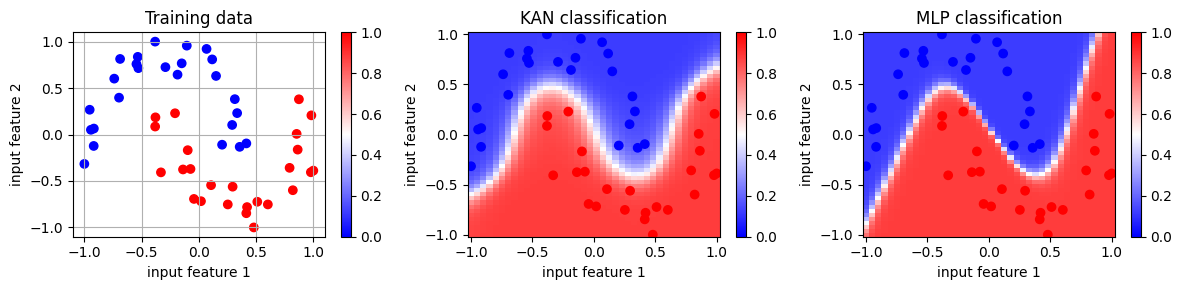

In [21]:
def softmax(vec):
    return np.exp(vec) / sum(np.exp(vec))

X1_cl, X2_cl = np.meshgrid(np.linspace(-1, 1, 40), np.linspace(-1, 1, 50))
x_cl = np.concatenate((X1_cl.reshape(-1, 1), X2_cl.reshape(-1, 1)), axis=1)

Y_kan_cl = np.array([softmax(kan_cl.forward(x))[1] for x in x_cl]).reshape(X1_cl.shape)
Y_mlp_cl = np.array([softmax(mlp_cl.forward(x))[1] for x in x_cl]).reshape(X1_cl.shape)

fig_cl, ax_cl = plt.subplots(1, 3, figsize=(12,3))
# vmin, vmax = min(Y_training.flatten()), max(Y_training.flatten())

ax_cl[0].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
ax_cl[0].grid()
ax_cl[0].set_title('Training data')
ax_cl[0].set_xlabel('input feature 1')
ax_cl[0].set_ylabel('input feature 2')

im0 = ax_cl[1].pcolor(X1_cl, X2_cl, Y_kan_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
ax_cl[1].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
ax_cl[1].set_title('KAN classification')
ax_cl[1].set_xlabel('input feature 1')
ax_cl[1].set_ylabel('input feature 2')

im1 = ax_cl[2].pcolor(X1_cl, X2_cl, Y_mlp_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
ax_cl[2].scatter(*x_train_cl.T, c=y_train_cl, cmap=plt.cm.bwr)
ax_cl[2].set_title('MLP classification')
ax_cl[2].set_xlabel('input feature 1')
ax_cl[2].set_ylabel('input feature 2')

fig_cl.colorbar(im1, ax=ax_cl[0])
fig_cl.colorbar(im1, ax=ax_cl[1])
fig_cl.colorbar(im1, ax=ax_cl[2])
fig_cl.tight_layout()
plt.show()
# fig_cl.savefig(folder_fig + 'classification.png', dpi=500)

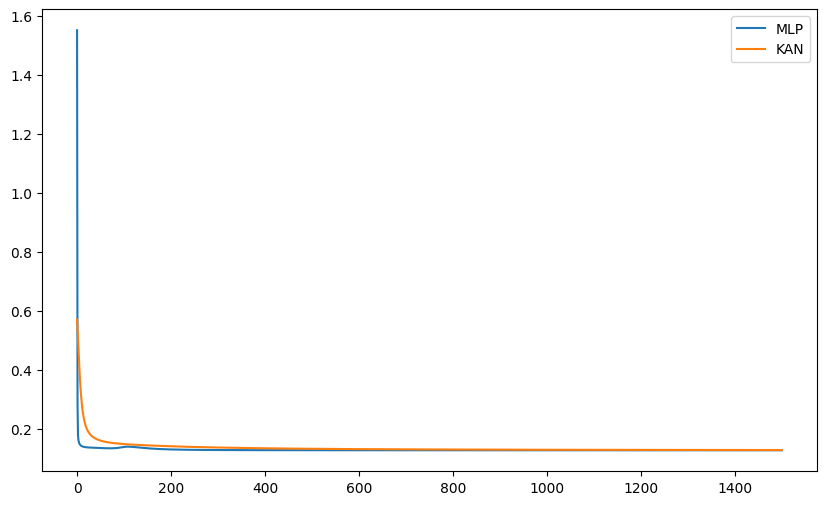

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(mlp_loss_cls, label='MLP')
ax.plot(kan_loss_cls, label='KAN')
ax.legend()
plt.show()

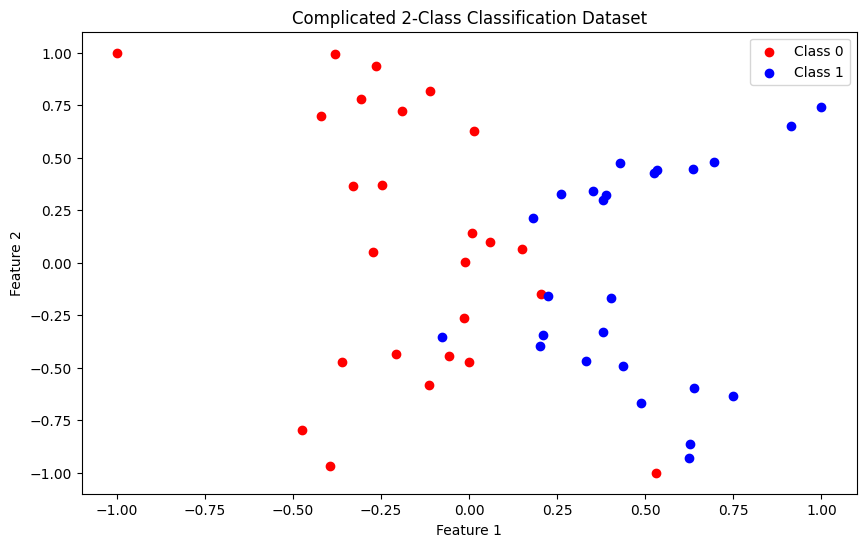

In [50]:
x_train_cl_2, y_train_cl_2 = datasets.make_classification(
                                                            n_samples=50,
                                                            n_features=2,
                                                            n_informative=2,
                                                            n_redundant=0,
                                                            n_clusters_per_class=2,
                                                            n_classes=2,
                                                            flip_y=0.1,
                                                            class_sep=1.0,
                                                            random_state=42,
                                                        )
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_cl_2 = scaler.fit_transform(x_train_cl_2)
# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(x_train_cl_2[y_train_cl_2 == 0][:, 0], x_train_cl_2[y_train_cl_2 == 0][:, 1], color='red', label='Class 0')
plt.scatter(x_train_cl_2[y_train_cl_2 == 1][:, 0], x_train_cl_2[y_train_cl_2 == 1][:, 1], color='blue', label='Class 1')
plt.title("Complicated 2-Class Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [56]:
from loss import CrossEntropyLoss

kan_cl = FeedForwardNetwork([2, 2, 2],  # layer size
                     learning_rate=.05,  # gradient descent parameter
                     n_weights_per_edge=8,  # n. edge functions
                     neuron_class=KANNeuron, 
                     loss=CrossEntropyLoss,
                     x_bounds=[-1, 1],  # input domain bounds
                     get_edge_fun=get_bsplines,  # edge function type (B-splines ot Chebyshev)
                     seed=472,
                     weights_range=[-1, 1])
kan_loss_cls = kan_cl.train(x_train_cl_2, y_train_cl_2.reshape(-1, 1), epochs=2000)

Epoch 1/2000, Loss: 0.7360193705096841
Epoch 2/2000, Loss: 0.64502726173586
Epoch 3/2000, Loss: 0.61030268343385
Epoch 4/2000, Loss: 0.5662123692545231
Epoch 5/2000, Loss: 0.5108187236591167
Epoch 6/2000, Loss: 0.45985211237928875
Epoch 7/2000, Loss: 0.42134415113123436
Epoch 8/2000, Loss: 0.39341667470373026
Epoch 9/2000, Loss: 0.3728536902965864
Epoch 10/2000, Loss: 0.3572715668087991
Epoch 11/2000, Loss: 0.3451235031638482
Epoch 12/2000, Loss: 0.33541500535334506
Epoch 13/2000, Loss: 0.32748918926879383
Epoch 14/2000, Loss: 0.3209001120365517
Epoch 15/2000, Loss: 0.31533485678569456
Epoch 16/2000, Loss: 0.31056988572559513
Epoch 17/2000, Loss: 0.306440869075401
Epoch 18/2000, Loss: 0.302826714277667
Epoch 19/2000, Loss: 0.29963603299088515
Epoch 20/2000, Loss: 0.2968037461253944
Epoch 21/2000, Loss: 0.2942811880960011
Epoch 22/2000, Loss: 0.2920557131543767
Epoch 23/2000, Loss: 0.2901108345231218
Epoch 24/2000, Loss: 0.28857963099951145
Epoch 25/2000, Loss: 0.28740950846929875
Epoch

In [52]:
from act import tanh_act
mlp_cl = FeedForwardNetwork([2, 10, 10, 2],  # layer size
                     learning_rate=.01,  # gradient descend parameter
                     activation=tanh_act,  # activation type (relu, tanh_act or sigmoid_act)
                     neuron_class=MLPNeuron, 
                     loss=CrossEntropyLoss,
                     seed=472, 
                     weights_range=[-1, 1])
mlp_loss_cls = mlp_cl.train(x_train_cl_2, 
                            y_train_cl_2.reshape(-1, 1), 
                            epochs=1500)

Epoch 1/1500, Loss: 0.8562937742260692
Epoch 2/1500, Loss: 0.5308742836047543
Epoch 3/1500, Loss: 0.40836851371339206
Epoch 4/1500, Loss: 0.3728528943056609
Epoch 5/1500, Loss: 0.34562825373257483
Epoch 6/1500, Loss: 0.3298038955802722
Epoch 7/1500, Loss: 0.3187397232853984
Epoch 8/1500, Loss: 0.3116271795115223
Epoch 9/1500, Loss: 0.30637930932412416
Epoch 10/1500, Loss: 0.3022658775771734
Epoch 11/1500, Loss: 0.298870128106269
Epoch 12/1500, Loss: 0.29598875944370584
Epoch 13/1500, Loss: 0.293500720415825
Epoch 14/1500, Loss: 0.2913247518534287
Epoch 15/1500, Loss: 0.28940205866263113
Epoch 16/1500, Loss: 0.28768825997566094
Epoch 17/1500, Loss: 0.2861490461718962
Epoch 18/1500, Loss: 0.2847574063838374
Epoch 19/1500, Loss: 0.28349175780709324
Epoch 20/1500, Loss: 0.2823346290134725
Epoch 21/1500, Loss: 0.2812717126343465
Epoch 22/1500, Loss: 0.28029117056337605
Epoch 23/1500, Loss: 0.27938311608373245
Epoch 24/1500, Loss: 0.27853922221197247
Epoch 25/1500, Loss: 0.27775242157489766


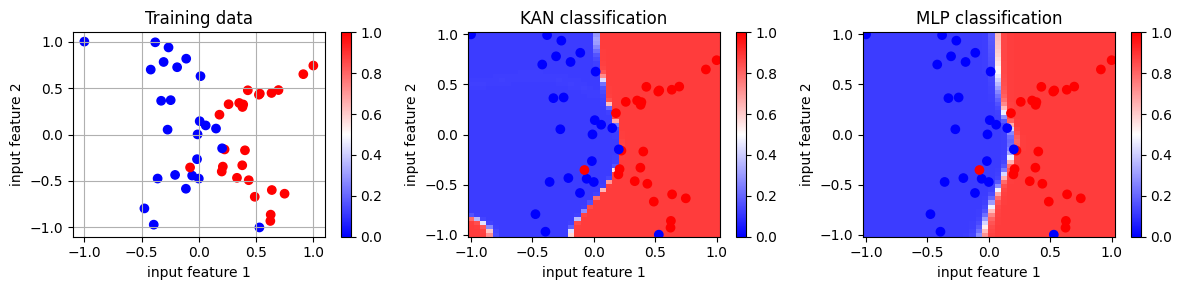

In [57]:
def softmax(vec):
    return np.exp(vec) / sum(np.exp(vec))

X1_cl, X2_cl = np.meshgrid(np.linspace(-1, 1, 40), np.linspace(-1, 1, 50))
x_cl = np.concatenate((X1_cl.reshape(-1, 1), X2_cl.reshape(-1, 1)), axis=1)

Y_kan_cl = np.array([softmax(kan_cl.forward(x))[1] for x in x_cl]).reshape(X1_cl.shape)
Y_mlp_cl = np.array([softmax(mlp_cl.forward(x))[1] for x in x_cl]).reshape(X1_cl.shape)

fig_cl, ax_cl = plt.subplots(1, 3, figsize=(12,3))
# vmin, vmax = min(Y_training.flatten()), max(Y_training.flatten())

ax_cl[0].scatter(*x_train_cl_2.T, c=y_train_cl_2, cmap=plt.cm.bwr)
ax_cl[0].grid()
ax_cl[0].set_title('Training data')
ax_cl[0].set_xlabel('input feature 1')
ax_cl[0].set_ylabel('input feature 2')

im0 = ax_cl[1].pcolor(X1_cl, X2_cl, Y_kan_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
ax_cl[1].scatter(*x_train_cl_2.T, c=y_train_cl_2, cmap=plt.cm.bwr)
ax_cl[1].set_title('KAN classification')
ax_cl[1].set_xlabel('input feature 1')
ax_cl[1].set_ylabel('input feature 2')

im1 = ax_cl[2].pcolor(X1_cl, X2_cl, Y_mlp_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
ax_cl[2].scatter(*x_train_cl_2.T, c=y_train_cl_2, cmap=plt.cm.bwr)
ax_cl[2].set_title('MLP classification')
ax_cl[2].set_xlabel('input feature 1')
ax_cl[2].set_ylabel('input feature 2')

fig_cl.colorbar(im1, ax=ax_cl[0])
fig_cl.colorbar(im1, ax=ax_cl[1])
fig_cl.colorbar(im1, ax=ax_cl[2])
fig_cl.tight_layout()
plt.show()
# fig_cl.savefig(folder_fig + 'classification.png', dpi=500)

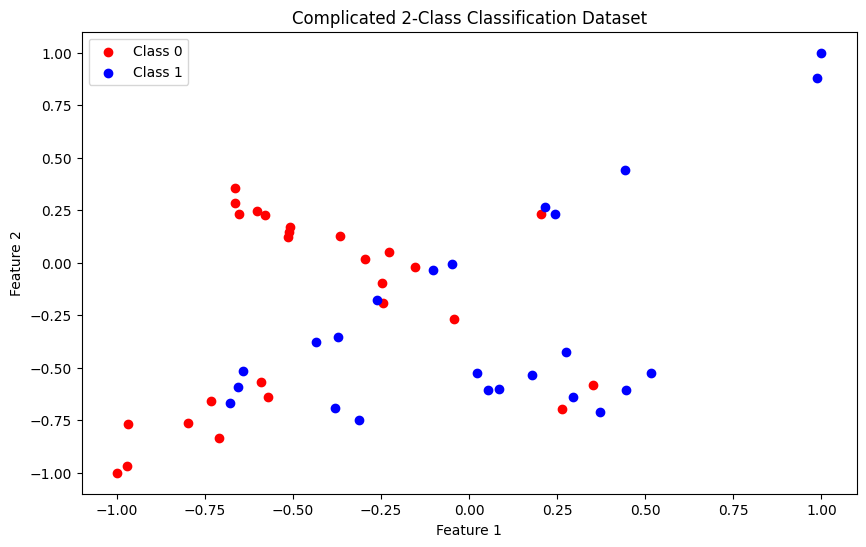

In [63]:
x_train_cl_2, y_train_cl_2 = datasets.make_classification(
                                                            n_samples=50,
                                                            n_features=2,
                                                            n_informative=2,
                                                            n_redundant=0,
                                                            n_clusters_per_class=2,
                                                            n_classes=2,
                                                            flip_y=0.3,
                                                            class_sep=0.8,
                                                            random_state=472,
                                                        )
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
x_train_cl_2 = scaler.fit_transform(x_train_cl_2)
# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(x_train_cl_2[y_train_cl_2 == 0][:, 0], x_train_cl_2[y_train_cl_2 == 0][:, 1], color='red', label='Class 0')
plt.scatter(x_train_cl_2[y_train_cl_2 == 1][:, 0], x_train_cl_2[y_train_cl_2 == 1][:, 1], color='blue', label='Class 1')
plt.title("Complicated 2-Class Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [68]:
from loss import CrossEntropyLoss

kan_cl = FeedForwardNetwork([2, 8, 2],  # layer size
                     learning_rate=.05,  # gradient descent parameter
                     n_weights_per_edge=8,  # n. edge functions
                     neuron_class=KANNeuron, 
                     loss=CrossEntropyLoss,
                     x_bounds=[-1, 1],  # input domain bounds
                     get_edge_fun=get_bsplines,  # edge function type (B-splines ot Chebyshev)
                     seed=472,
                     weights_range=[-1, 1])
kan_loss_cls = kan_cl.train(x_train_cl_2, y_train_cl_2.reshape(-1, 1), epochs=2000)

Epoch 1/2000, Loss: 0.7151585359853584
Epoch 2/2000, Loss: 0.6691818341596637
Epoch 3/2000, Loss: 0.6837588455310069
Epoch 4/2000, Loss: 0.6355131623548865
Epoch 5/2000, Loss: 0.5094232235725439
Epoch 6/2000, Loss: 0.4928712708748826
Epoch 7/2000, Loss: 0.48215916728631386
Epoch 8/2000, Loss: 0.4755996834923692
Epoch 9/2000, Loss: 0.4712114506997825
Epoch 10/2000, Loss: 0.4677487034201942
Epoch 11/2000, Loss: 0.464711665251667
Epoch 12/2000, Loss: 0.46197286711333946
Epoch 13/2000, Loss: 0.45955506822703457
Epoch 14/2000, Loss: 0.45757265952824183
Epoch 15/2000, Loss: 0.4563893784798618
Epoch 16/2000, Loss: 0.45648221717386656
Epoch 17/2000, Loss: 0.45881597149425135
Epoch 18/2000, Loss: 0.46285328352820715
Epoch 19/2000, Loss: 0.46605310054533355
Epoch 20/2000, Loss: 0.464130092732934
Epoch 21/2000, Loss: 0.4566372942162362
Epoch 22/2000, Loss: 0.44943499437126505
Epoch 23/2000, Loss: 0.44420253558674216
Epoch 24/2000, Loss: 0.44155778181959093
Epoch 25/2000, Loss: 0.4395709232476533


In [66]:
from act import tanh_act
mlp_cl = FeedForwardNetwork([2, 10, 10, 2],  # layer size
                     learning_rate=.01,  # gradient descend parameter
                     activation=tanh_act,  # activation type (relu, tanh_act or sigmoid_act)
                     neuron_class=MLPNeuron, 
                     loss=CrossEntropyLoss,
                     seed=472, 
                     weights_range=[-1, 1])
mlp_loss_cls = mlp_cl.train(x_train_cl_2, 
                            y_train_cl_2.reshape(-1, 1), 
                            epochs=2000)

Epoch 1/2000, Loss: 0.838176203053139
Epoch 2/2000, Loss: 0.630426724424202
Epoch 3/2000, Loss: 0.5566844236314666
Epoch 4/2000, Loss: 0.5368183978349417
Epoch 5/2000, Loss: 0.5251785437540021
Epoch 6/2000, Loss: 0.5180758929473097
Epoch 7/2000, Loss: 0.5127853581551604
Epoch 8/2000, Loss: 0.5089067834129013
Epoch 9/2000, Loss: 0.505798587497495
Epoch 10/2000, Loss: 0.5032679913889462
Epoch 11/2000, Loss: 0.5011324473054072
Epoch 12/2000, Loss: 0.4992989673980464
Epoch 13/2000, Loss: 0.49769879463039934
Epoch 14/2000, Loss: 0.4962852199642358
Epoch 15/2000, Loss: 0.49502481165727674
Epoch 16/2000, Loss: 0.49389169601847677
Epoch 17/2000, Loss: 0.49286658541063927
Epoch 18/2000, Loss: 0.49193369632926875
Epoch 19/2000, Loss: 0.4910806872023868
Epoch 20/2000, Loss: 0.49029718173382664
Epoch 21/2000, Loss: 0.48957475252634197
Epoch 22/2000, Loss: 0.48890619583862494
Epoch 23/2000, Loss: 0.4882854954375314
Epoch 24/2000, Loss: 0.4877074449072819
Epoch 25/2000, Loss: 0.48716760561343436
Epo

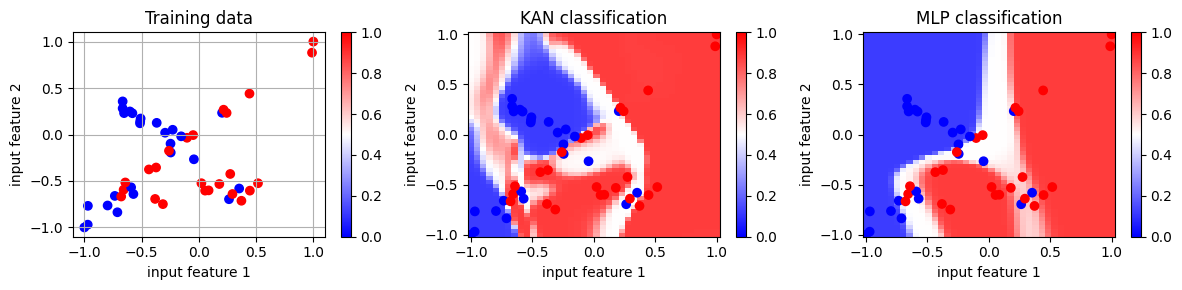

In [69]:
def softmax(vec):
    return np.exp(vec) / sum(np.exp(vec))

X1_cl, X2_cl = np.meshgrid(np.linspace(-1, 1, 40), np.linspace(-1, 1, 50))
x_cl = np.concatenate((X1_cl.reshape(-1, 1), X2_cl.reshape(-1, 1)), axis=1)

Y_kan_cl = np.array([softmax(kan_cl.forward(x))[1] for x in x_cl]).reshape(X1_cl.shape)
Y_mlp_cl = np.array([softmax(mlp_cl.forward(x))[1] for x in x_cl]).reshape(X1_cl.shape)

fig_cl, ax_cl = plt.subplots(1, 3, figsize=(12,3))
# vmin, vmax = min(Y_training.flatten()), max(Y_training.flatten())

ax_cl[0].scatter(*x_train_cl_2.T, c=y_train_cl_2, cmap=plt.cm.bwr)
ax_cl[0].grid()
ax_cl[0].set_title('Training data')
ax_cl[0].set_xlabel('input feature 1')
ax_cl[0].set_ylabel('input feature 2')

im0 = ax_cl[1].pcolor(X1_cl, X2_cl, Y_kan_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
ax_cl[1].scatter(*x_train_cl_2.T, c=y_train_cl_2, cmap=plt.cm.bwr)
ax_cl[1].set_title('KAN classification')
ax_cl[1].set_xlabel('input feature 1')
ax_cl[1].set_ylabel('input feature 2')

im1 = ax_cl[2].pcolor(X1_cl, X2_cl, Y_mlp_cl, vmin=0, vmax=1, cmap=plt.cm.bwr)
ax_cl[2].scatter(*x_train_cl_2.T, c=y_train_cl_2, cmap=plt.cm.bwr)
ax_cl[2].set_title('MLP classification')
ax_cl[2].set_xlabel('input feature 1')
ax_cl[2].set_ylabel('input feature 2')

fig_cl.colorbar(im1, ax=ax_cl[0])
fig_cl.colorbar(im1, ax=ax_cl[1])
fig_cl.colorbar(im1, ax=ax_cl[2])
fig_cl.tight_layout()
plt.show()
# fig_cl.savefig(folder_fig + 'classification.png', dpi=500)